In [2]:
import pandas as pd

# Load the dataset
file_path = 'E:/CognoRise InfoTech/archive (3)/CarPrice_Assignment.csv'
car_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
car_data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploratory Data Analysis (EDA):

In [17]:
# General information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
# Check for missing values
missing_values = car_data.isnull().sum()
# Summarize statistics of numerical features
numerical_summary = car_data.describe()

missing_values, numerical_summary

(car_ID              0
 symboling           0
 CarName             0
 fueltype            0
 aspiration          0
 doornumber          0
 carbody             0
 drivewheel          0
 enginelocation      0
 wheelbase           0
 carlength           0
 carwidth            0
 carheight           0
 curbweight          0
 enginetype          0
 cylindernumber      0
 enginesize          0
 fuelsystem          0
 boreratio           0
 stroke              0
 compressionratio    0
 horsepower          0
 peakrpm             0
 citympg             0
 highwaympg          0
 price               0
 dtype: int64,
            car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
 count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
 mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
 std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
 min      1.000000   -2.000000   86.600000  141.100000   60

# Feature Engineering:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Split categorical and numerical columns
categorical_cols = car_data.select_dtypes(include=['object']).columns.drop('CarName')  # Exclude CarName for now
numerical_cols = car_data.select_dtypes(include=['int64', 'float64']).columns.drop('price')  # Exclude target variable

In [31]:
# One-hot encode categorical variables with updated parameter
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
encoded_categorical = pd.DataFrame(
    encoder.fit_transform(car_data[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)


In [33]:
# Scale numerical variables
scaler = StandardScaler()
scaled_numerical = pd.DataFrame(
    scaler.fit_transform(car_data[numerical_cols]),
    columns=numerical_cols
)

In [35]:
# Combine preprocessed data
preprocessed_data = pd.concat([scaled_numerical, encoded_categorical], axis=1)


In [37]:
# Add the target variable
preprocessed_data['price'] = car_data['price']


In [39]:
# Train-test split
X = preprocessed_data.drop('price', axis=1)
y = preprocessed_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 44), (41, 44), (164,), (41,))

# Modeling:

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

In [44]:
# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [46]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2

(1610.1913311247288,
 2802.244493940133,
 1226.6044263716035,
 1990.6088184968971,
 0.9565256515582902,
 0.9005298423323501)

# Feature Importance:

In [49]:
# Feature Importance for Linear Regression
import pandas as pd

feature_importance = pd.Series(lr_model.coef_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


enginelocation_rear      1.189446e+04
enginesize               4.114723e+03
curbweight               2.678452e+03
aspiration_turbo         2.105024e+03
fuelsystem_mpfi          1.780648e+03
enginetype_ohc           1.740918e+03
carwidth                 1.413267e+03
highwaympg               1.218353e+03
enginetype_ohcf          1.140726e+03
drivewheel_rwd           1.109475e+03
fuelsystem_2bbl          9.081542e+02
peakrpm                  7.984698e+02
wheelbase                5.936605e+02
fuelsystem_4bbl          5.781429e+02
carheight                5.024148e+02
compressionratio         4.872501e+02
fuelsystem_idi           2.613708e+02
symboling                1.266247e+02
cylindernumber_three     2.728484e-12
horsepower              -4.787268e+01
drivewheel_fwd          -1.270262e+02
fueltype_gas            -2.613708e+02
boreratio               -3.817617e+02
doornumber_two          -4.211396e+02
fuelsystem_spdi         -4.338446e+02
carlength               -9.627000e+02
fuelsystem_s

# Residual Analysis:

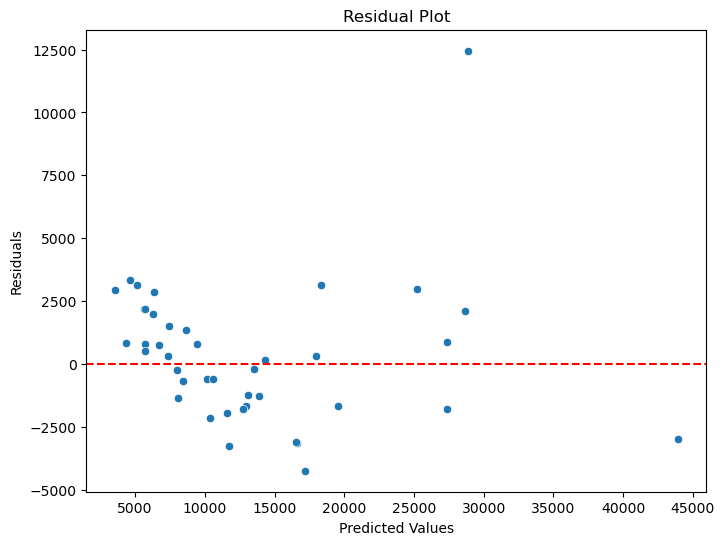

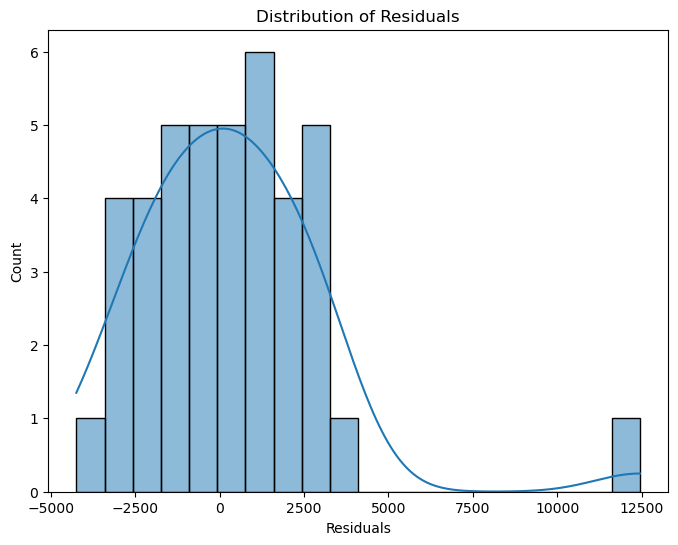

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred_test

# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


# Cross-Validation:

In [55]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores)

print("Cross-Validation RMSE Scores:", cv_rmse)
print("Mean RMSE:", cv_rmse.mean())
print("Standard Deviation RMSE:", cv_rmse.std())


Cross-Validation RMSE Scores: [4614.23889533 6420.24909368 3456.03530204 6445.55770409 5100.57919237]
Mean RMSE: 5207.332037501789
Standard Deviation RMSE: 1134.4220103150276


# Hyper-Parameters Tuning:

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Example: Random Forest Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Model Export:

In [61]:
import joblib

# Save the trained model
joblib.dump(lr_model, 'car_price_model.pkl')

# Load the model for future use
loaded_model = joblib.load('car_price_model.pkl')
